# About the Dataset

The Breast Cancer Diagnostic data is available on the UCI Machine Learning Repository. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information:**

ID number
<br>Diagnosis (M = malignant, B = benign) 3-32)
<br>Ten real-valued features are computed for each cell nucleus:
<br>1. radius (mean of distances from center to points on the perimeter)
<br>2. texture (standard deviation of gray-scale values)
<br>3. perimeter
<br>4. area
<br>5. smoothness (local variation in radius lengths)
<br>6. compactness (perimeter^2 / area - 1.0)
<br>7. concavity (severity of concave portions of the contour)
<br>8. concave points (number of concave portions of the contour)
<br>9. symmetry
<br>10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Loading Libraries and Data

We will import essential libraries such as NumPy, pandas, Seaborn, and matplotlib, then we use pandas to load the Breast Cancer Wisconsin (Diagnostic) Data Set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv("data.csv")

# 1. Seperate Target from Features

We drop columns that cannot be used for analysis and classification.

We are dropping columns that have no bearing on the analysis we will be conducting, and will instead clutter our analysis. After producing descriptive statistics about the data, we will separate the target from the features.

The target contains the diagnosis with binary class labels, M or B, for malignant and benign tumors respectively.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
y = data['diagnosis'] #class label
drop_columns = ['Unnamed: 32', 'id','diagnosis'] #drop columns that won't help in the classification
x = data.drop(drop_columns, axis = 1) #since dropping columns axis = 1, otherwise 0
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Diagnosis Distribution Visualization

We check if there is class imbalance.

We generate descriptive statistics about the features that summarize the central tendency, dispersion and shape of the data set's distribution.

Number of Benign Tumors  357
Number of Malignant Tumors  212


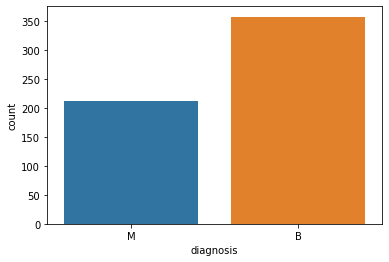

In [6]:
imbalance = sns.countplot(y, label = "Count of Target") #label gives legend to the plot
Benign, Malignant = y.value_counts()
print("Number of Benign Tumors ", Benign)
print("Number of Malignant Tumors ", Malignant)

More Benign Tumors than Malignant Tumors, hence there is a little class imbalance

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There is a lot of difference between the ranges of the features, so we might have to normalize or standardize the data before performing classification

# 3. Visualizing Standardized Data using Violin Plot and Box Plot

As the columns in the data set take on values of varying range, we need to standardize the data before proceeding with further analysis and visualization.

To begin feature analysis, we use Seaborn's violinplot() method. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

In [8]:
data_standardized = (x - x.mean())/x.std()
data_standardized.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.136331e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.120470e-15,-1.074321e-15,-4.031144e-16,1.006030e-15,-1.888550e-15,4.860396e-16,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.033661e-15,-2.118204e-15,6.649631e-16,-1.795088e-16,-2.481734e-15,2.424930e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00



melt() function is useful to reduce a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

To visualize better we group data into 3 sets of 10 columns each

hue is used to color the plot based on a class label. When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

inner{“box”, “quartile”, “point”, “stick”, None}
Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

Rotating the features in x-axis so they are easier to read

**Violin plot for column 0-9**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

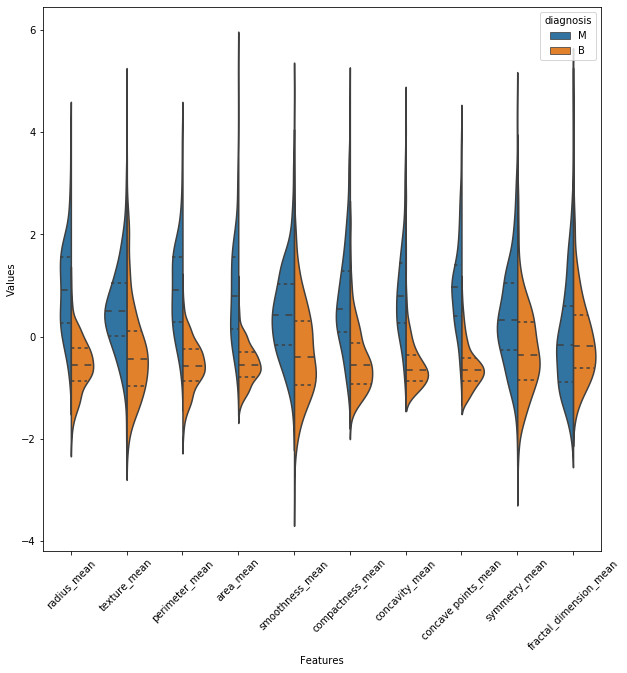

In [9]:
data_plot = pd.concat([y, data_standardized.iloc[:, 0:10]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.violinplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot, split= True, inner = "quartile")
plt.xticks(rotation = 45)

**Violin Plot for column 10-19**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

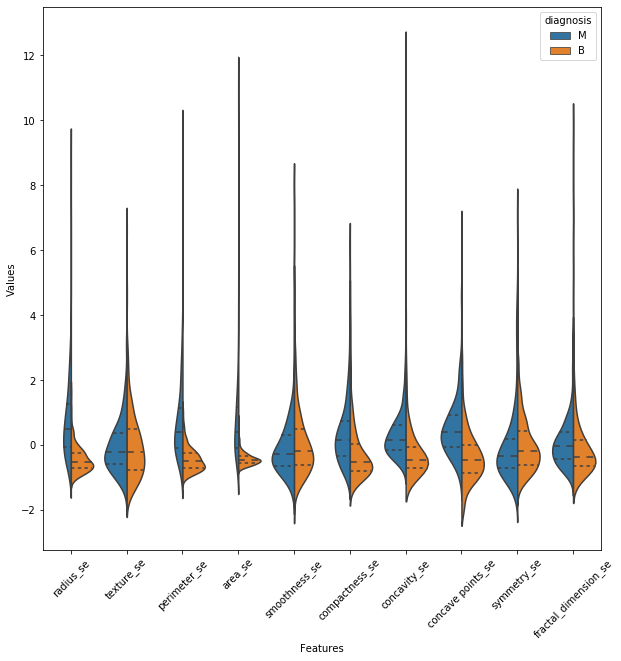

In [10]:
data_plot = pd.concat([y, data_standardized.iloc[:, 10:20]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.violinplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot, split= True, inner = "quartile")
plt.xticks(rotation = 45)

**Violin Plot for column 20-29**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

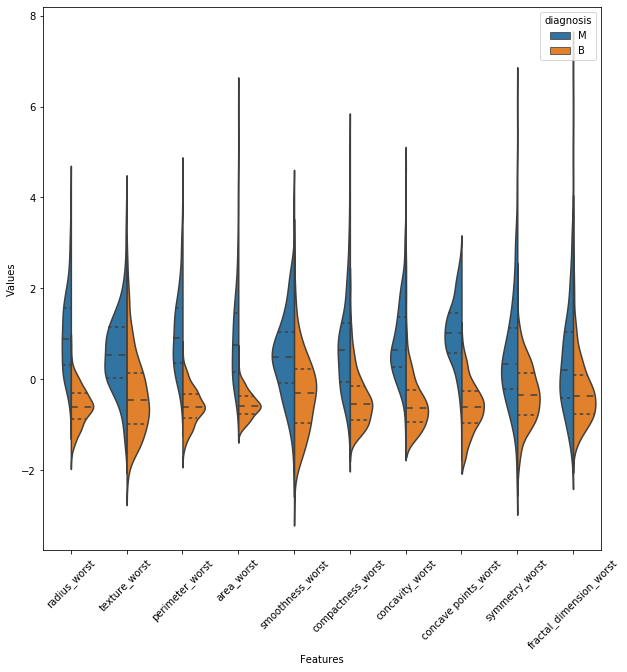

In [11]:
data_plot = pd.concat([y, data_standardized.iloc[:, 20:30]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.violinplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot, split= True, inner = "quartile")
plt.xticks(rotation = 45)

**Violin plot for all the columns**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

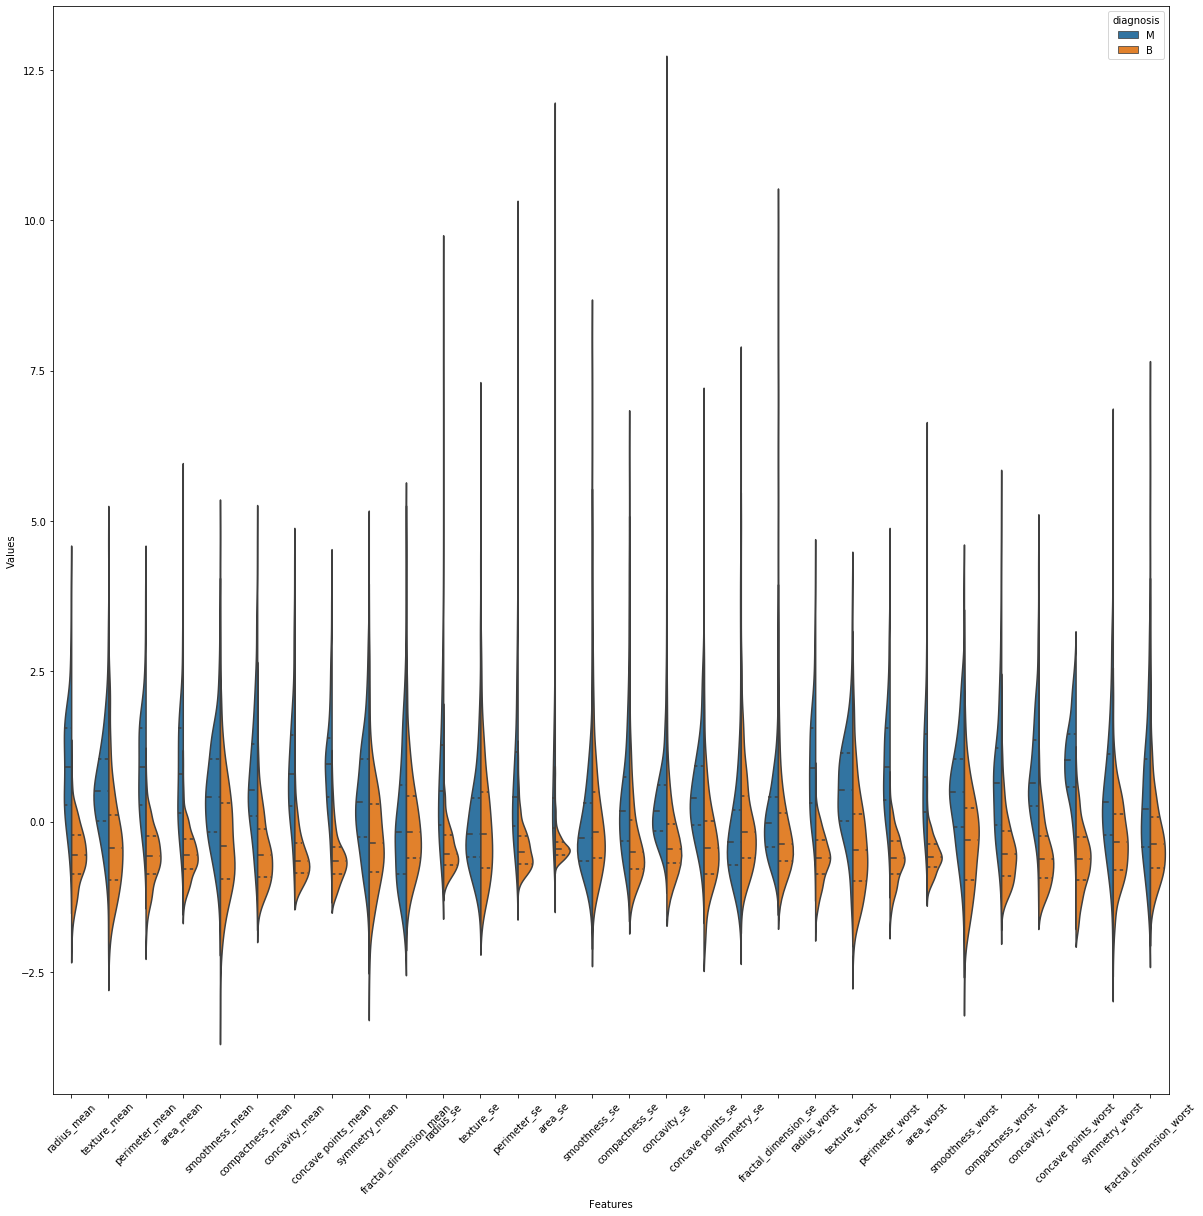

In [12]:
data_plot = pd.concat([y, data_standardized.iloc[:, 0:30]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (20, 20)) #set figure size in matplotlib
sns.violinplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot, split= True, inner = "quartile")
plt.xticks(rotation = 45)

median of perimeter_mean, area_mean,compactness_mean are seperated, so they are good factors for classification

The violin plots of concavity features and concave_points features of mean, se and worst look very similar, so it will be useful to check for their correlation, and if they are correlated, we can reduce the redundancy by using only any one of the columns

**Boxplots are useful to check for outliers in data**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

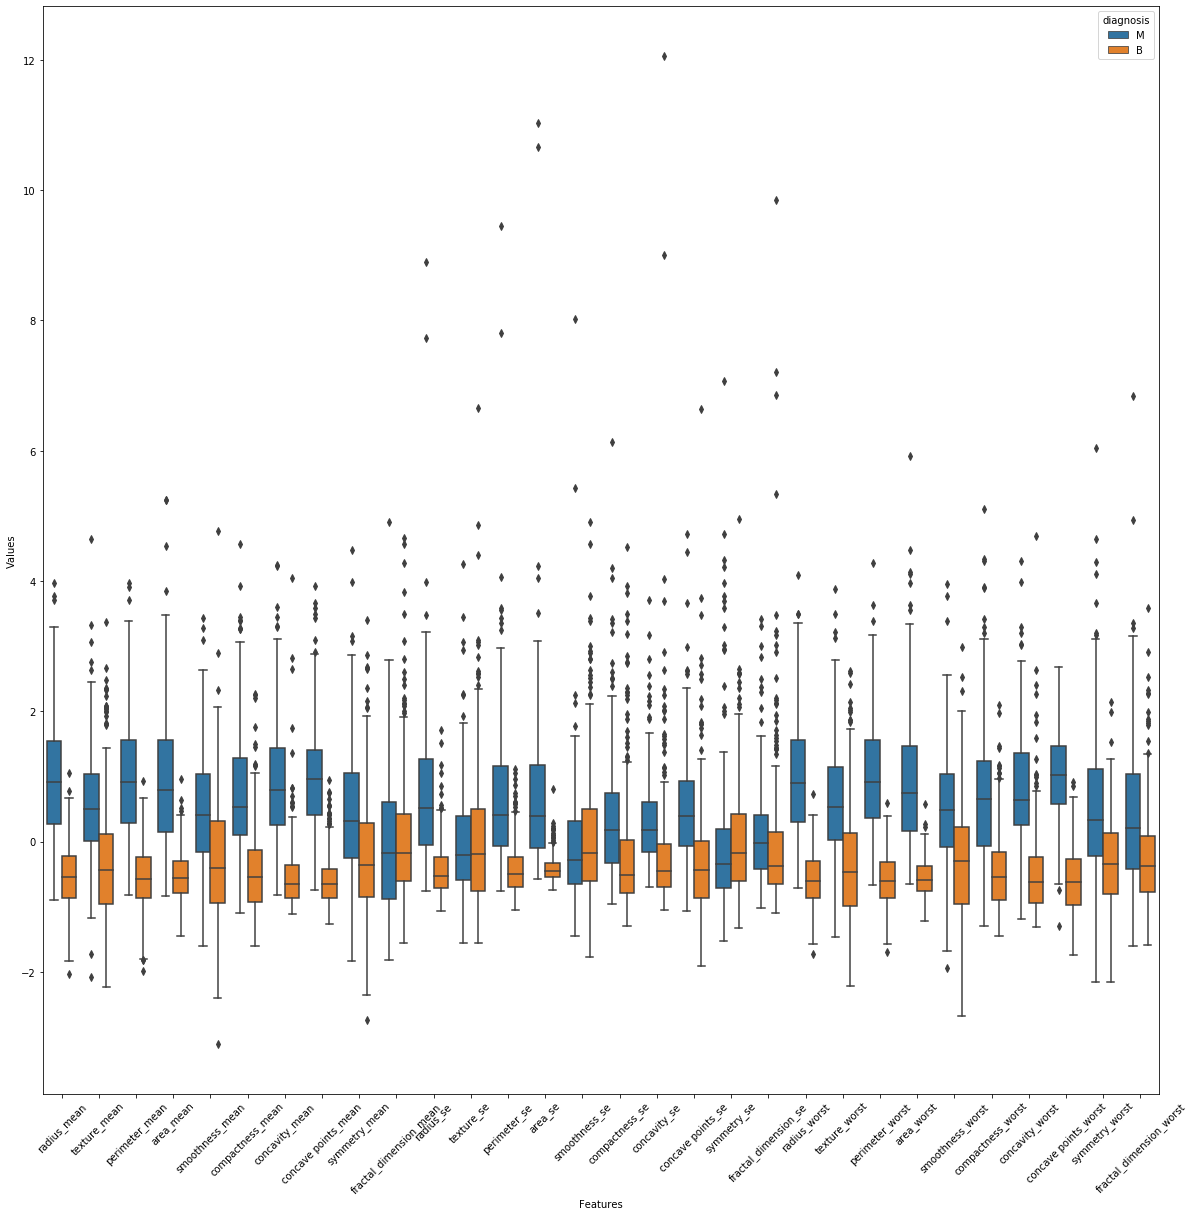

In [13]:
plt.figure(figsize = (20, 20))
sns.boxplot(x = "Features", y = "Values", data = data_plot, hue = "diagnosis")
plt.xticks(rotation = 45)

# 4. Visualizing Data using Joint Plots for Feature Comparison

Joint plots come in handy to illustrate the relationship between two features.

Creating Joint plots of concavity features and concave_points features of mean, se and worst, to understand the Pearson Correlation, so that we can drop one column if they are highly correlated.

We use seaborn's jointplot() method to draw a scatter plot with marginal histograms and kernel density fits. We can examine the relationship between any two features using the Pearson correlation coefficient of the regression through our scatter plot.

kind{ “scatter” | “reg” | “resid” | “kde” | “hex” }, Kind of plot to draw.


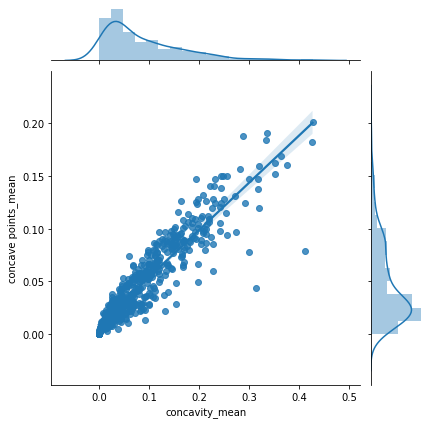

In [14]:
sns.jointplot(x.loc[:,'concavity_mean'], x.loc[:, 'concave points_mean'], kind = 'reg')

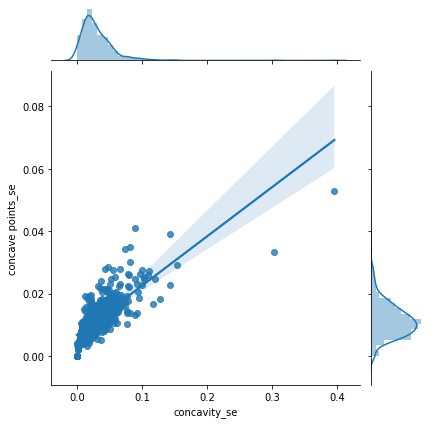

In [15]:
sns.jointplot(x.loc[:,'concavity_se'], x.loc[:, 'concave points_se'], kind = 'reg')

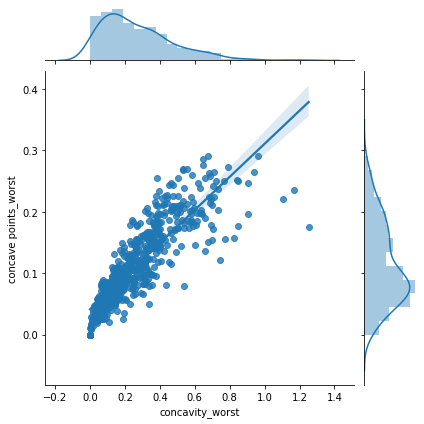

In [16]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:, 'concave points_worst'], kind = 'reg')

# 5. Visualization of Data using Swarm Plots

A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

Using Swarm plots, it is easier to tell the seperability of the features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

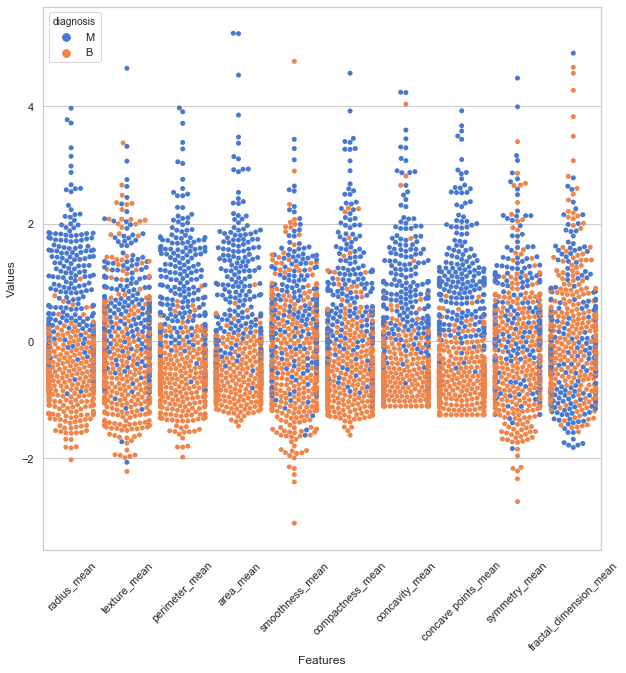

In [17]:
sns.set(style="whitegrid", palette = "muted")
data_plot = pd.concat([y, data_standardized.iloc[:, 0:10]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.swarmplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

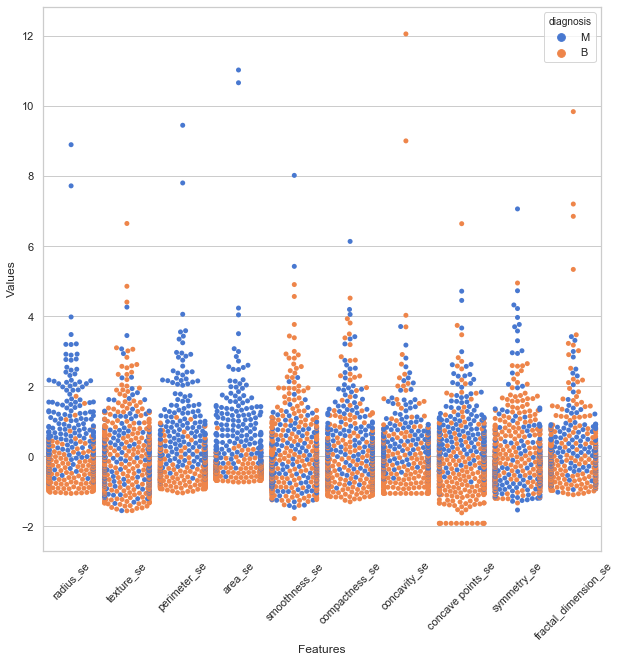

In [18]:
data_plot = pd.concat([y, data_standardized.iloc[:, 10:20]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.swarmplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

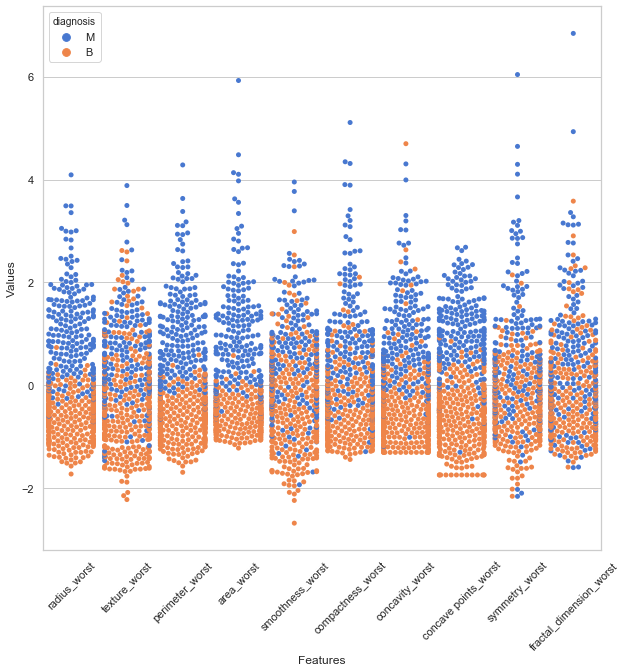

In [19]:
data_plot = pd.concat([y, data_standardized.iloc[:, 20:30]], axis = 1)
data_plot = pd.melt(data_plot, id_vars = 'diagnosis', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (10, 10)) #set figure size in matplotlib
sns.swarmplot(x = "Features", y = "Values", hue = "diagnosis", data = data_plot)
plt.xticks(rotation = 45)

# 6. Visualizing all Pair-wise Correlations

A good way to identify correlations between features is to visualize the correlation matrix as a heatmap. We make a note of the correlated features so that we can drop them from our data set.

annot{bool or rectangular dataset} If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

fmt : string. String formatting code to use when adding annotations. Used to specify precision


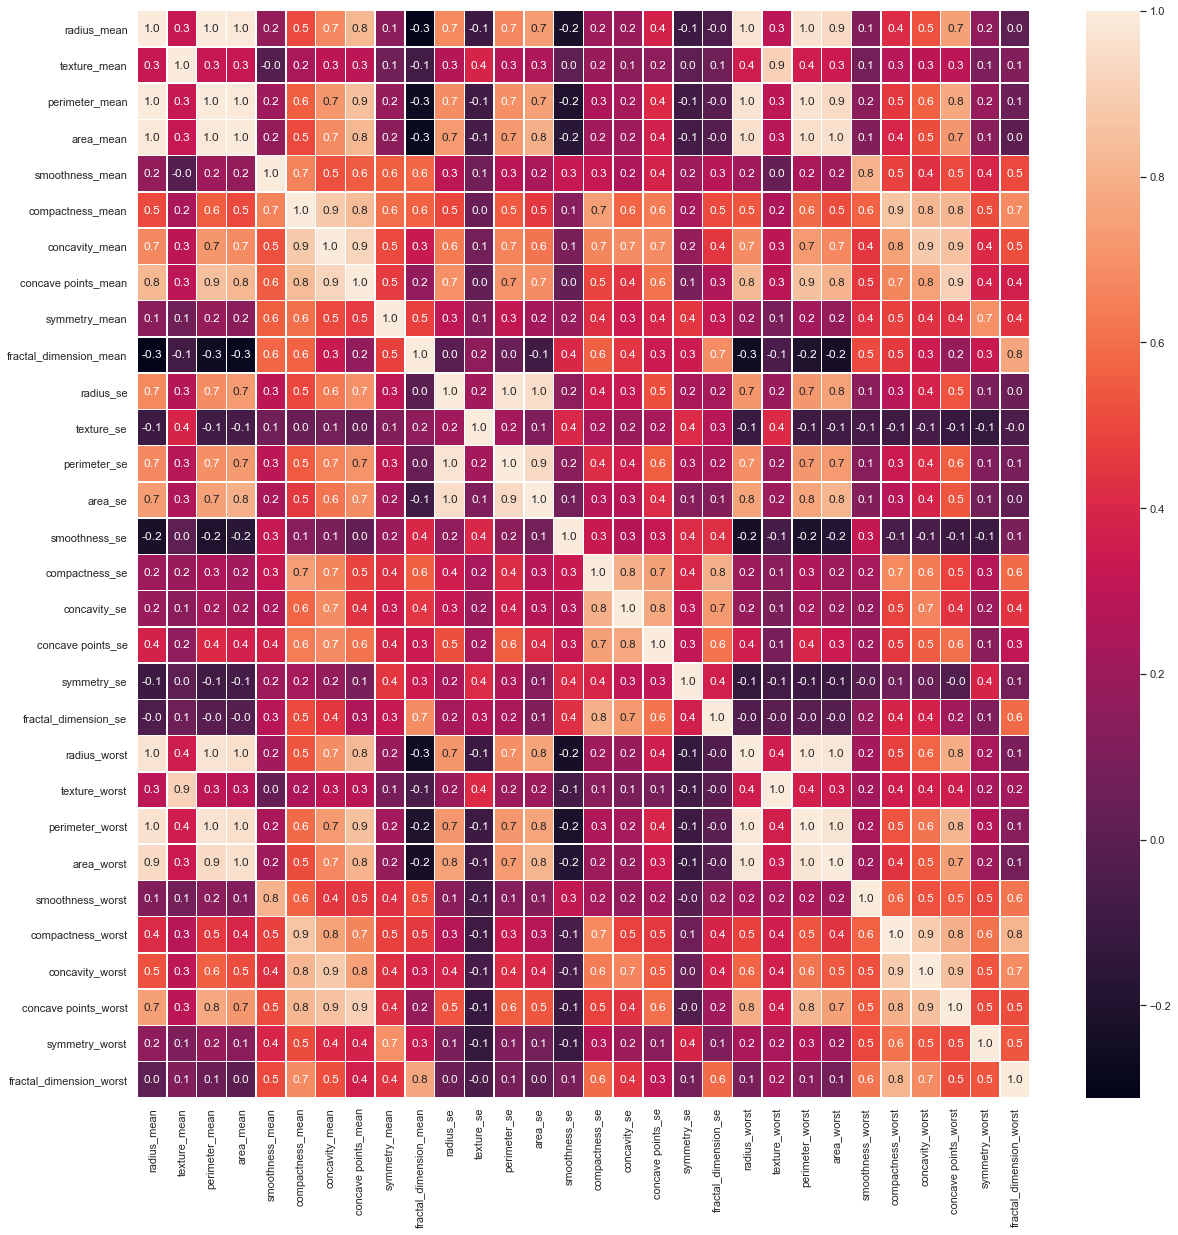

In [21]:
feature, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot = True, linewidth=0.5, fmt = '.1f', ax = axis)

# 7. Dropping Correlated Columns from Feature List

Using the heatmap of the correlation matrix, we identify columns to be dropped. Out of a set of correlated features, we will preserve the one that best separates the data.	We identify these salient features using the violin plots and swarm plots 

In [23]:
drop_cols = ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']
df = x.drop(drop_cols, axis = 1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


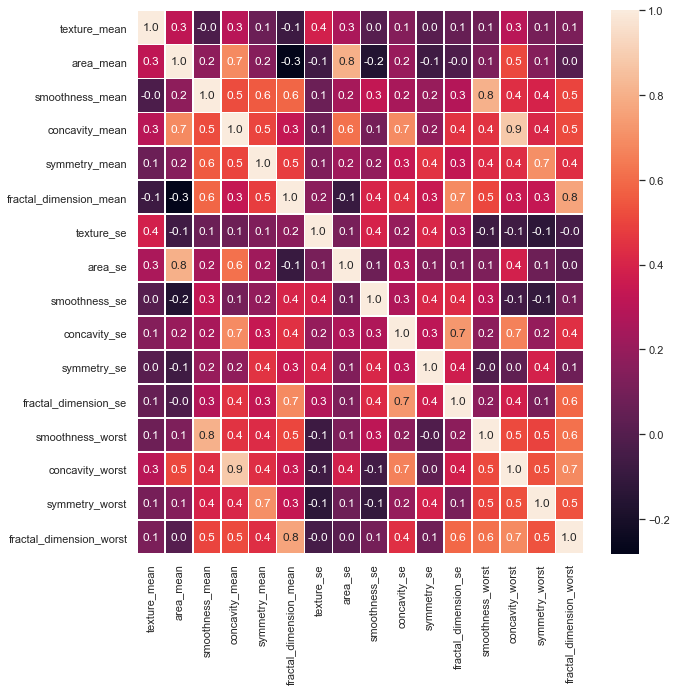

In [26]:
feature, axis = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, linewidth=0.5, fmt = '.1f', ax = axis)

# 8. Classification using XGBoost (minimal feature selection)

Next, we use a helper function from scikit-learn to create split the data into training and test sets. Using the default parameters, fit the XGBClassifier estimator to the training set and use the model to predict values in the test set. Evaluate the performance of the classifier using the accuracy score, f-1 score, and confusion matrix from sklearn.metrics.

If int, random_state is the seed used by the random number generator; random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random


In [27]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 30) #creating 70-30 split of data
clf_1 = xgb.XGBClassifier(random_state = 30)
clf_1 = clf_1.fit(x_train, y_train)

Accuracy is :  0.9824561403508771


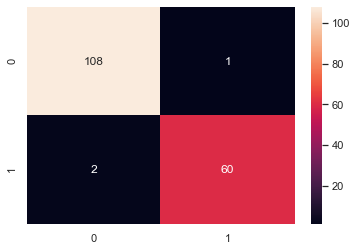

In [30]:
print("Accuracy is : ", accuracy_score(y_test, clf_1.predict(x_test)))
cm = confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot = True, fmt = 'd') #integer precisiom

# 9. Univariate Feature Selection using XGBoost

In univariate feature selection, we use the SelectKBest() function from scikit-learn. The score returned can be used to select n features with the highest values for the test chi-squared statistic from the data. The chi-square test measures the dependence between stochastic variables. Using this function weeds out the features that are the most likely to be independent of class and therefore irrelevant for classification.

Chi-Square is sensitive to small frequencies in cells of tables. Generally, when the expected value in a cell of a table is less than 5, chi-square can lead to errors in conclusions.


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
select_features = SelectKBest(chi2, k=10).fit(x_train, y_train)
print("Score List : ", select_features.scores_)
print("Feature List : ", x_train.columns)

Score List :  [6.74662460e+01 3.26311649e+04 1.10567771e-01 1.30717729e+01
 1.78996275e-01 8.52500835e-05 3.86754949e-02 5.59854678e+03
 3.19452648e-03 7.15909765e-01 2.56004861e-04 6.52866539e-03
 3.31105581e-01 2.77360171e+01 1.00202035e+00 2.03901348e-01]
Feature List :  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [34]:
x_train_2 = select_features.transform(x_train)
x_test_2 = select_features.transform(x_test)
clf_2 = xgb.XGBClassifier().fit(x_train_2, y_train)

Accuracy is :  0.9824561403508771


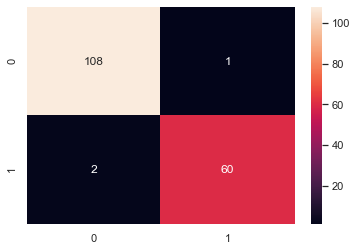

In [36]:
print("Accuracy is : ", accuracy_score(y_test, clf_2.predict(x_test_2)))
cm = confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm, annot = True, fmt = 'd') #integer precisiom

# 10. Recursive Feature Selection with Cross Validation

We find the best features and also the optimal number of features needed for the best classification accuracy. We use function RFECV()

step: int or float (default=1) If greater than or equal to 1, then step corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration. Note that the last iteration may remove fewer than step features in order to reach min_features_to_select.

cv = k, k-fold cross validation

Attributes of RFECV()

n_features_ : int, The number of selected features with cross-validation.

support_ : array, The mask of selected features.

ranking_ : array, The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

grid_scores_ : array, The cross-validation scores such that grid_scores_[i] corresponds to the CV score of the i-th subset of features.

estimator_ : object, The external estimator fit on the reduced dataset.

In [40]:
from sklearn.feature_selection import RFECV

clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator = clf_3, cv = 5, step = 1, scoring = 'accuracy', n_jobs = -1).fit(x_train, y_train)

print("Optimal number of features : ", rfecv.n_features_)
print("Best features : ", x_train.columns[rfecv.support_])

Optimal number of features :  14
Best features :  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Accuracy is :  0.9824561403508771


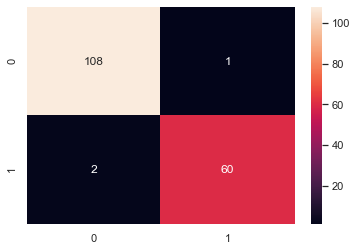

In [42]:
print("Accuracy is : ", accuracy_score(y_test, rfecv.predict(x_test)))
cm = confusion_matrix(y_test, rfecv.predict(x_test))
sns.heatmap(cm, annot = True, fmt = 'd') #integer precisiom

[Text(0, 0.5, 'Cv Scores'), Text(0.5, 0, 'Number of Features')]

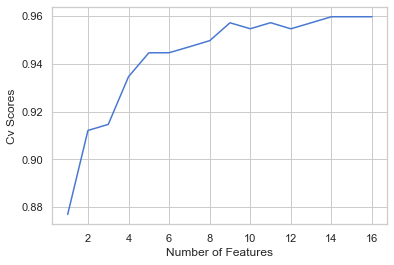

In [44]:
num_features = [i for  i in range(1, len(rfecv.grid_scores_)+1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x = num_features, y = cv_scores)
ax.set(xlabel = "Number of Features", ylabel = "Cv Scores")

# 11. Feature Extraction using Principal Component Analysis (PCA

Using principle component analysis (PCA) for feature extraction. We first need to normalize the data for better performance. A plot of the cumulative explained variance against the number of components gives the percentage of variance explained by each of the selected components. This curve quantifies how much of the total variance is contained within the first N components.


In [60]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30) #creating 70-30 split of data
x_train_norm = (x_train - x_train.mean())/(x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.mean())/(x_test.max() - x_test.min())

Text(0, 0.5, 'Cumulative Explained Variance')

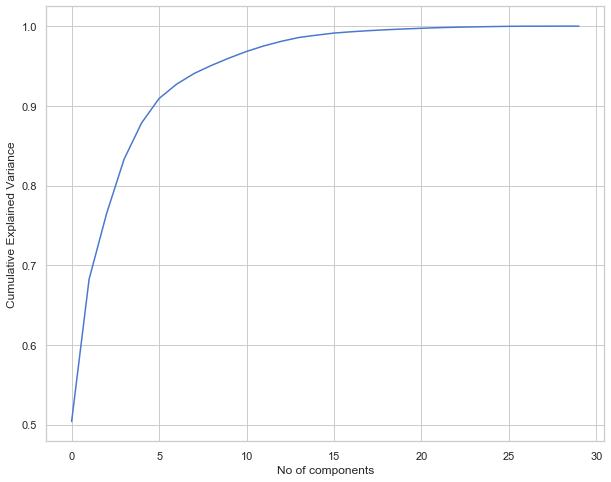

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_norm)
plt.figure(1, figsize=(10, 8))
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Cumulative Explained Variance")


Thus we can see to retain around 99% of variance of data, we have to maintain approx 16 components 